<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Tarea_00_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Tarea 00: Dataset de pingüinos

### Dayana Andrea Henao Arbeláez

In [1604]:
# Importe de las librerías necesarias

import pandas as pd 
import seaborn as sns
import numpy as np  
import matplotlib.pyplot as plt

In [1605]:
# Cargar el dataset de pingüinos

df=sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Primera aproximación a los datos de forma general y su limpieza:

1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie?

In [1606]:
# Especies únicas en el DataFrame

df.species.unique()


array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [1607]:
# Características de los pingüinos
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Hay 3 especies diferentes de pingüinos en el dataset.

Las características que se dan para cada pingüino son: species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex. Es decir, la especie, la isla de la que provienen, la longitud del pico (mm), la profundidad del pico (mm), la longitud de la aleta (mm), el peso (g) y el sexo. 


2. ¿Hay valores faltantes en las variables? Determine una estrategia de limpieza y apliquela.

In [1608]:
# Para ver cuántos datos faltantes hay en cada columna
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

En el conjunto de datos se identificaron 8 valores faltantes en las variables cuantitativas (bill_length_mm: 2, bill_depth_mm: 2, flipper_length_mm: 2 y body_mass_g: 2), y 11 valores faltantes en la variable cualitativa sex.

In [1609]:
# Para ver en qué filas hay datos faltantes
df[df.isnull().any(axis=1)]


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [1610]:
df["bill_length_mm"].fillna(df["bill_length_mm"].mean(), inplace=True)
df["bill_depth_mm"].fillna(df["bill_depth_mm"].mean(), inplace=True)
df["flipper_length_mm"].fillna(df["flipper_length_mm"].mean(), inplace=True)
df["body_mass_g"].fillna(df["body_mass_g"].mean(), inplace=True)

df["sex"].fillna(df["sex"].mode()[0], inplace=True)
df.isnull().sum()

/tmp/ipykernel_4765/1598177670.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bill_length_mm"].fillna(df["bill_length_mm"].mean(), inplace=True)
/tmp/ipykernel_4765/1598177670.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Para las variables cuantitativas con valores faltantes se aplicó una imputación mediante la media, mientras que para las variables cualitativas se utilizó una imputación mediante la moda. 

3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?


In [1611]:
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [1612]:
# Haciendolo con porcentajes (Idea de ChatGPT)

df['island'].value_counts(normalize=True) * 100


island
Biscoe       48.837209
Dream        36.046512
Torgersen    15.116279
Name: proportion, dtype: float64

La isla con el mayor número de pingüinos es Biscoe. Claramente hay un desbalance en el número de pingüinos por isla. Mientras que Biscoe tiene 168 pingüinos, Torgersen tiene 52. En término de porcentajes se puede observar mucho mejor este desbalance. La isla Torgersen sólo cuenta con un 15% del valor total de los pingüinos. 

4. Repita la pregunta anterior observando las especies.

In [1613]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [1614]:
# Haciendolo con porcentajes 

df['species'].value_counts(normalize=True) * 100

species
Adelie       44.186047
Gentoo       36.046512
Chinstrap    19.767442
Name: proportion, dtype: float64

El mayor número de Pingüinos son de la especie Adeline. También hay un desbalance respecto a las especies, mientras que 152 pingüinos son de especio Adelie, sólo 68 son de la especie Chinstrap, lo que equivale a un 19%. 

## Tendencias y visualizacion de las variables

5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie?

In [1615]:
print(f'Media de la longitud del pico de los pingüinos de la especie Adelie: {df['bill_length_mm'][df['species']=='Adelie'].mean()}')
print(f'Desviación estándar de la longitud del pico de los pingüinos de la especie Adelie: {df['bill_length_mm'][df['species']=='Adelie'].std()}')

Media de la longitud del pico de los pingüinos de la especie Adelie: 38.82514427516159
Desviación estándar de la longitud del pico de los pingüinos de la especie Adelie: 2.6869910612792394


In [1616]:
print(f'Media de la longitud del pico de los pingüinos de la especie Chinstrap: {df['bill_length_mm'][df['species']=='Chinstrap'].mean()}')
print(f'Desviación estándar de la longitud del pico de los pingüinos de la especie Chinstrap: {df['bill_length_mm'][df['species']=='Chinstrap'].std()}')

Media de la longitud del pico de los pingüinos de la especie Chinstrap: 48.83382352941177
Desviación estándar de la longitud del pico de los pingüinos de la especie Chinstrap: 3.3392558959358865


In [1617]:
print(f'Media de la longitud del pico de los pingüinos de la especie Gentoo: {df['bill_length_mm'][df['species']=='Gentoo'].mean()}')
print(f'Desviación estándar de la longitud del pico de los pingüinos de la especie Gentoo: {df['bill_length_mm'][df['species']=='Gentoo'].std()}')

Media de la longitud del pico de los pingüinos de la especie Gentoo: 47.475983305036785
Desviación estándar de la longitud del pico de los pingüinos de la especie Gentoo: 3.086122969346802


In [1618]:
# Forma más sencilla de hacerlo (Idea de ChatGPT)
df.groupby("species")["bill_length_mm"].agg(["mean", "std"])


,mean,std
species,,
Adelie,38.825144,2.686991
Chinstrap,48.833824,3.339256
Gentoo,47.475983,3.086123


6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?

In [1619]:
for i in range(len(df.bill_length_mm)):
    if df.bill_length_mm[i]==df['bill_length_mm'].max():
        print(f'El pingüino con el pico más largo es de la especie {df.species[i]} y su longitud es {df.bill_length_mm[i]} mm')

El pingüino con el pico más largo es de la especie Gentoo y su longitud es 59.6 mm


In [1620]:
# Otra forma de hacerlo
df.loc[df["bill_length_mm"].idxmax(), ["species", "bill_length_mm"]]


species           Gentoo
bill_length_mm      59.6
Name: 253, dtype: object

7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos?

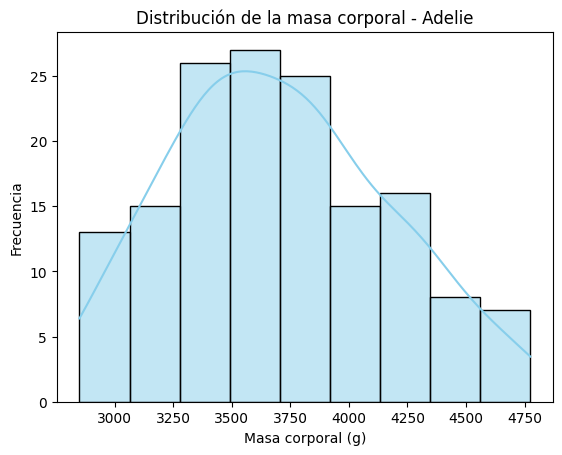

In [1621]:
# Adelie
sns.histplot(data=df[df["species"] == "Adelie"], x="body_mass_g", kde=True, color="skyblue")
plt.title("Distribución de la masa corporal - Adelie")
plt.xlabel("Masa corporal (g)")
plt.ylabel("Frecuencia")
plt.show()

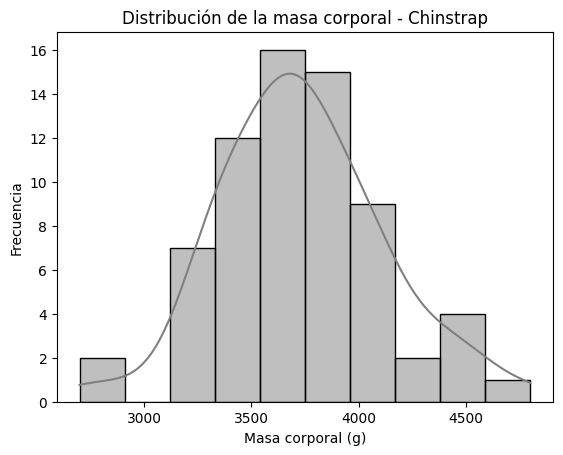

In [1622]:
# Chinstrap
sns.histplot(data=df[df["species"] == "Chinstrap"], x="body_mass_g", kde=True, color="gray")
plt.title("Distribución de la masa corporal - Chinstrap")
plt.xlabel("Masa corporal (g)")
plt.ylabel("Frecuencia")
plt.show()




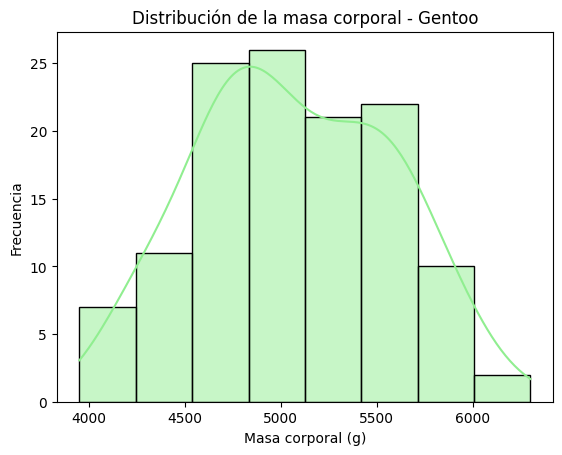

In [1623]:
# Gentoo
sns.histplot(data=df[df["species"] == "Gentoo"], x="body_mass_g", kde=True, color="lightgreen")
plt.title("Distribución de la masa corporal - Gentoo")
plt.xlabel("Masa corporal (g)")
plt.ylabel("Frecuencia")
plt.show()

/tmp/ipykernel_4765/2753573195.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="species", y="body_mass_g", palette=palette)


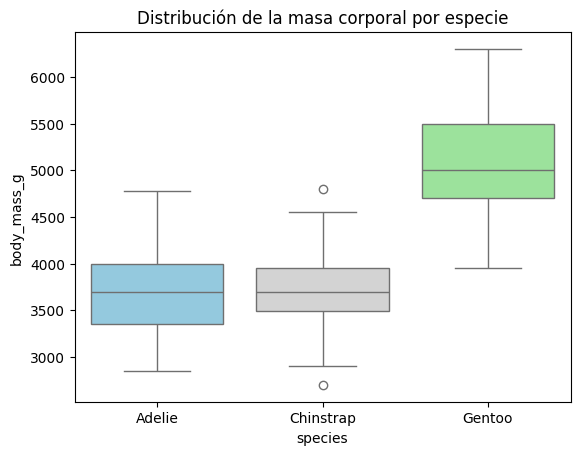

In [1624]:
palette = {"Adelie": "skyblue", "Chinstrap": "lightgrey", "Gentoo": "lightgreen"}
sns.boxplot(data=df, x="species", y="body_mass_g", palette=palette)
plt.title("Distribución de la masa corporal por especie")
plt.show()


8. Describa la distribucion con ayuda de la media, desviacion estandard

In [1625]:
print(f'Media de la distribución de la masa corporal de los pingüinos de la especie Adelie: {df['body_mass_g'][df['species']=='Adelie'].mean()}')
print(f'Desviación estándar de la distribución de la masa corporal de los pingüinos de la especie Adelie: {df['body_mass_g'][df['species']=='Adelie'].std()}')

Media de la distribución de la masa corporal de los pingüinos de la especie Adelie: 3703.95891043398
Desviación estándar de la distribución de la masa corporal de los pingüinos de la especie Adelie: 458.8487982798897


In [1626]:
print(f'Media de la distribución de la masa corporal de los pingüinos de la especie Chinstrap: {df['body_mass_g'][df['species']=='Chinstrap'].mean()}')
print(f'Desviación estándar de la distribución de la masa corporal de los pingüinos de la especie Chinstrap: {df['body_mass_g'][df['species']=='Chinstrap'].std()}')

Media de la distribución de la masa corporal de los pingüinos de la especie Chinstrap: 3733.0882352941176
Desviación estándar de la distribución de la masa corporal de los pingüinos de la especie Chinstrap: 384.3350813871914


In [1627]:
print(f'Media de la distribución de la masa corporal de los pingüinos de la especie Gentoo: {df['body_mass_g'][df['species']=='Gentoo'].mean()}')
print(f'Desviación estándar de la distribución de la masa corporal de los pingüinos de la especie Gentoo: {df['body_mass_g'][df['species']=='Gentoo'].std()}')

Media de la distribución de la masa corporal de los pingüinos de la especie Gentoo: 5068.965761177136
Desviación estándar de la distribución de la masa corporal de los pingüinos de la especie Gentoo: 508.16438197028134


In [1628]:
# Forma más sencilla de hacerlo 
df.groupby("species")["body_mass_g"].agg(["mean", "std"])

,mean,std
species,,
Adelie,3703.958910,458.848798
Chinstrap,3733.088235,384.335081
Gentoo,5068.965761,508.164382


9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras?

In [1629]:
print(f'La diferencia en masa corporal promedio entre machos y hembras es: {df['body_mass_g'][df['sex']=='Male'].mean()-df['body_mass_g'][df['sex']=='Female'].mean()}')

La diferencia en masa corporal promedio entre machos y hembras es: 652.4116792743666


In [1630]:
print(f'La diferencia en desviación estándar de la masa corporal entre machos y hembras es: {df['body_mass_g'][df['sex']=='Male'].std()-df['body_mass_g'][df['sex']=='Female'].std()}')

La diferencia en desviación estándar de la masa corporal entre machos y hembras es: 119.88062548197558


10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie?

In [1631]:
# Cálculo de la media y desviación estándar de la longitud de las aletas por especie

df.groupby("species")["flipper_length_mm"].agg(["mean", "std"])

,mean,std
species,,
Adelie,190.025758,6.578130
Chinstrap,195.823529,7.131894
Gentoo,217.055768,6.621801


11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?

In [1632]:
# Para conocer la longitud mínima de las aletas por especie

df.groupby("species")["flipper_length_mm"].min()

species
Adelie       172.000000
Chinstrap    178.000000
Gentoo       200.915205
Name: flipper_length_mm, dtype: float64

In [1633]:
# Para conocer la longitud máxima de las aletas por especie

df.groupby("species")["flipper_length_mm"].max()

species
Adelie       210.0
Chinstrap    212.0
Gentoo       231.0
Name: flipper_length_mm, dtype: float64

12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?

In [1634]:
# Para observar las variables que necesito 

df[["species", "island", "bill_length_mm"]]

,species,island,bill_length_mm
0,Adelie,Torgersen,39.10000
1,Adelie,Torgersen,39.50000
2,Adelie,Torgersen,40.30000
3,Adelie,Torgersen,43.92193
4,Adelie,Torgersen,36.70000
...,...,...,...
339,Gentoo,Biscoe,43.92193
340,Gentoo,Biscoe,46.80000
341,Gentoo,Biscoe,50.40000
342,Gentoo,Biscoe,45.20000


In [1635]:
# Necesito comparar la variable bill_length_mm según dos categorías: isla y especie.

df.groupby(["species", "island"])["bill_length_mm"].mean()

species    island   
Adelie     Biscoe       38.975000
           Dream        38.501786
           Torgersen    39.046576
Chinstrap  Dream        48.833824
Gentoo     Biscoe       47.475983
Name: bill_length_mm, dtype: float64

Según el cálculo de la media de la longitud del pico en las diferentes especies y islas, se observa que en la especie Adelie, los pingüinos de la isla Torgersen presentan, en promedio, los picos más largos (39.05 mm), aunque la diferencia frente a Biscoe (38.98 mm) y Dream (38.50 mm) es muy poca. En contraste, la especie Chinstrap, presente únicamente en la isla Dream, exhibe un pico más largo, con una media de 48.83 mm. Finalmente, los pingüinos Gentoo, que habitan únicamente en Biscoe, tienen un promedio de longitud de pico de 47.48 mm.


13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?

In [1636]:
# Agrupar por isla y especie, y calcular la media de bill_length_mm
grouped = df.groupby(["island", "species"])["bill_length_mm"].mean()

# Convertir a tabla pivote (islas como filas, especies como columnas)
pivot = grouped.unstack()

# Calcular la diferencia entre el valor máximo y mínimo en cada isla
pivot["range"] = pivot.max(axis=1) - pivot.min(axis=1)

print(pivot)
print("\nIsla con mayor variación:", pivot["range"].idxmax())


species       Adelie  Chinstrap     Gentoo      range
island                                               
Biscoe     38.975000        NaN  47.475983   8.500983
Dream      38.501786  48.833824        NaN  10.332038
Torgersen  39.046576        NaN        NaN   0.000000

Isla con mayor variación: Dream


## Relación entre caracteristicas de los pingüinos


14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.


In [1637]:
df[['species','bill_length_mm', 'body_mass_g']]

,species,bill_length_mm,body_mass_g
0,Adelie,39.10000,3750.000000
1,Adelie,39.50000,3800.000000
2,Adelie,40.30000,3250.000000
3,Adelie,43.92193,4201.754386
4,Adelie,36.70000,3450.000000
...,...,...,...
339,Gentoo,43.92193,4201.754386
340,Gentoo,46.80000,4850.000000
341,Gentoo,50.40000,5750.000000
342,Gentoo,45.20000,5200.000000


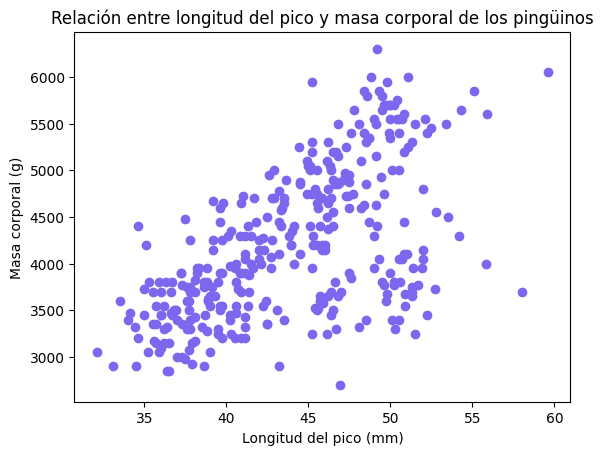

In [1638]:
plt.scatter(df['bill_length_mm'], df['body_mass_g'], c='mediumslateblue')
plt.xlabel('Longitud del pico (mm)')
plt.ylabel('Masa corporal (g)')
plt.title('Relación entre longitud del pico y masa corporal de los pingüinos')
plt.show()

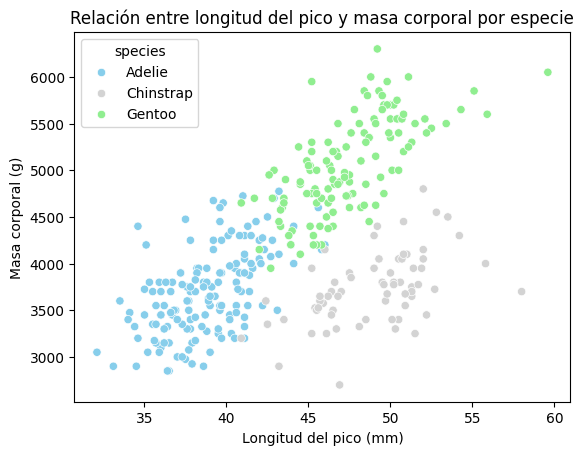

In [1639]:
# Filtrando por especies

palette = {"Adelie": "skyblue", "Chinstrap": "lightgrey", "Gentoo": "lightgreen"}
sns.scatterplot(data=df, x="bill_length_mm", y="body_mass_g", hue="species", palette=palette)

plt.xlabel("Longitud del pico (mm)")
plt.ylabel("Masa corporal (g)")
plt.title("Relación entre longitud del pico y masa corporal por especie")
plt.show()


15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?



In [1640]:
# Correlación para todos los pingüinos 

corr = df['bill_length_mm'].corr(df['body_mass_g'])
print(f"Correlación total: {corr}")

Correlación total: 0.5951098244376302


In [1641]:
# Correlación por especie

for i in df['species'].unique():
    subset = df[df['species'] == i]
    corr = subset['bill_length_mm'].corr(subset['body_mass_g'])
    print(f"Correlación en {i}: {corr}")


Correlación en Adelie: 0.5538303243884335
Correlación en Chinstrap: 0.5136383479489105
Correlación en Gentoo: 0.6736363731181065


De estos resultados se puede interpretar que existe una correlación más o menos fuerte entre la longitud del pico y la masa corporal de los pingüinos. En términos generales, a mayor masa corporal, mayor es la longitud del pico. Este efecto es más evidente en la especie Gentoo, aunque la tendencia se observa en las demás especies también.

16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?

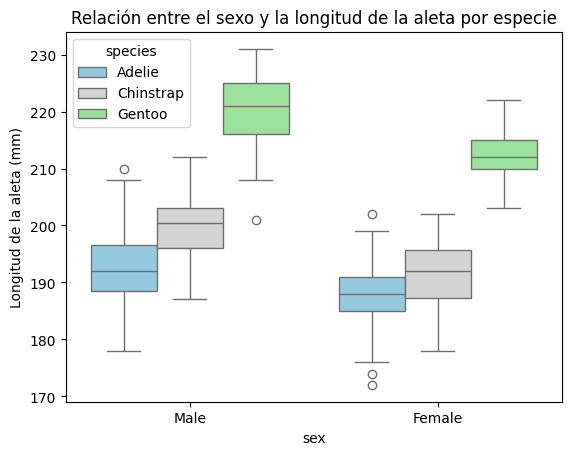

In [1642]:
# Filtrando por especies

palette = {"Adelie": "skyblue", "Chinstrap": "lightgrey", "Gentoo": "lightgreen"}
sns.boxplot(data=df, x="sex", y="flipper_length_mm", hue="species", palette=palette)

plt.xlabel("sex")
plt.ylabel("Longitud de la aleta (mm)")
plt.title("Relación entre el sexo y la longitud de la aleta por especie")
plt.show()


El gráfico muestra la relación entre la longitud de la aleta de los pingüinos y su sexo para las diferentes especies. Se observa que los pingüinos Gentoo son los que tienen la aleta más grande, mientras que las especies Adelie y Chinstrap presentan tamaños de aletas más pequeños y similares entre sí. En todas las especies los machos tienden a tener una aleta más grande que las hembras, siendo esta diferencia más marcada en los Gentoo.

## Test de hipótesis

17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.

**$H_0$:** La longitud de la aleta es independiente del sexo (La distribución de la longitud de la aleta es la misma para machos y hembras)

**Hipótesis alternativa:** La longitud de la aleta difiere entre sexos para cada especie

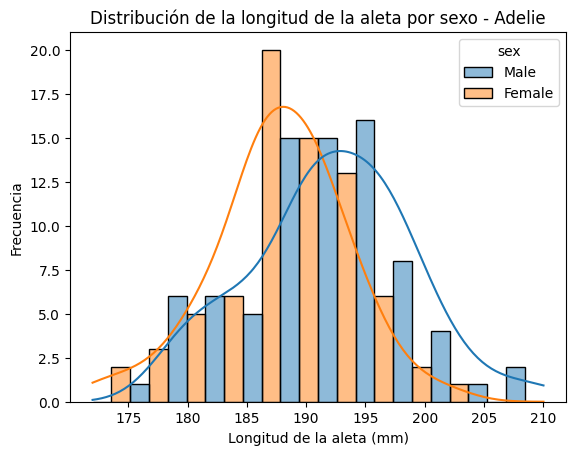

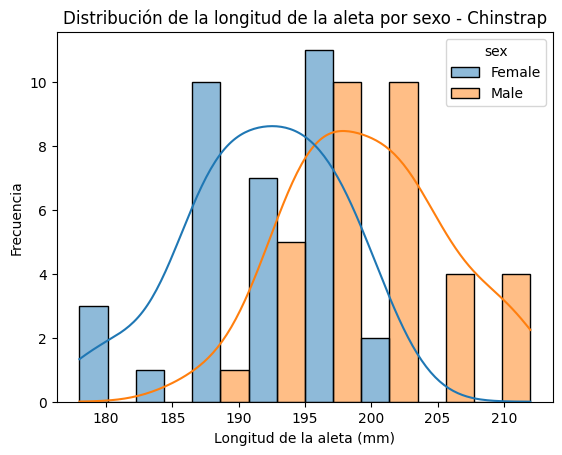

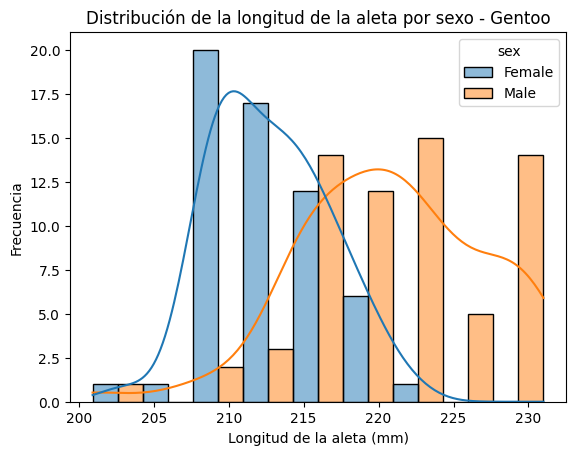

In [1643]:
species_list = df["species"].unique()

for i in species_list:
    subset = df[df["species"] == i]
    sns.histplot(data=subset, x="flipper_length_mm", hue="sex", multiple="dodge", edgecolor="black", kde=True)
    plt.xlabel("Longitud de la aleta (mm)")
    plt.ylabel("Frecuencia")
    plt.title(f"Distribución de la longitud de la aleta por sexo - {i}")
    plt.show()


In [1644]:
def permutation_test_diff_means(
    data, group_col, value_col, group_a, group_b, especie,
    n_permutations=1000, random_state=2
):
    # Generador de números aleatorios con semilla (para reproducibilidad)
    rng = np.random.default_rng(random_state)

    # Filtramos los datos solo para los dos grupos de interés 
    subset = data[data[group_col].isin([group_a, group_b])][[group_col, value_col]].dropna()

    # Extraemos los valores de la variable de interés y sus etiquetas de grupo
    values = subset[value_col].values
    labels = subset[group_col].values

    # Diferencia observada 
    # Calculamos la media de cada grupo en los datos originales
    mean_a = subset[subset[group_col] == group_a][value_col].mean()
    mean_b = subset[subset[group_col] == group_b][value_col].mean()
    diff_obs = mean_b - mean_a   # diferencia observada entre medias reales

    # Permutaciones 
    diffs = np.empty(n_permutations)  # arreglo donde guardamos cada diferencia simulada
    for i in range(n_permutations):
        # Mezclamos aleatoriamente las etiquetas de grupo (hipótesis nula: no hay diferencia real)
        shuffled = rng.permuted(labels)

        # Calculamos medias con las etiquetas mezcladas
        mean_a_sh = values[shuffled == group_a].mean() if (shuffled == group_a).sum() > 0 else 0
        mean_b_sh = values[shuffled == group_b].mean() if (shuffled == group_b).sum() > 0 else 0
        diffs[i] = mean_b_sh - mean_a_sh  # guardamos la diferencia simulada

    # Cálculo del p-value
    # Proporción de permutaciones que generan una diferencia >= a la observada (dos colas)
    p_val = np.mean(np.abs(diffs) >= np.abs(diff_obs))

    # Gráfico
    plt.hist(diffs, bins=20, edgecolor="black")
    plt.axvline(diff_obs, color="red", linestyle="--", label=f"Dif Observada = {diff_obs:.3f}")
    plt.title(f"{especie} | Permutación: {group_b} - {group_a}")
    plt.xlabel("Diferencia de medias")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.show()

    return diff_obs, p_val, diffs



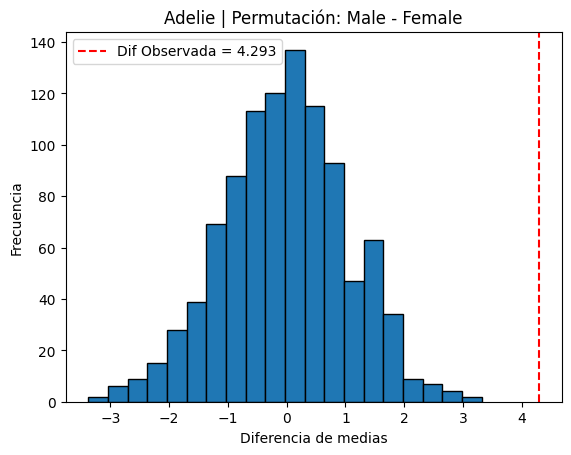

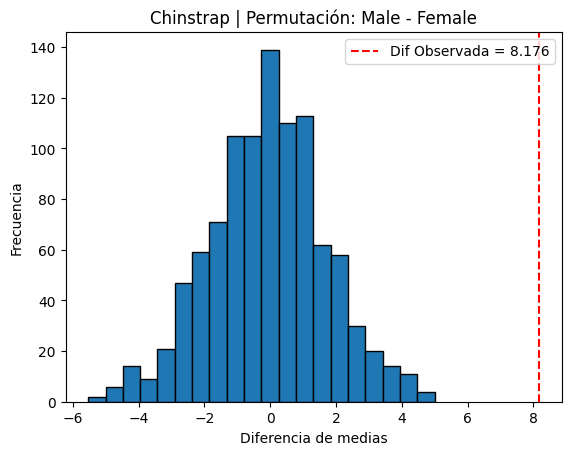

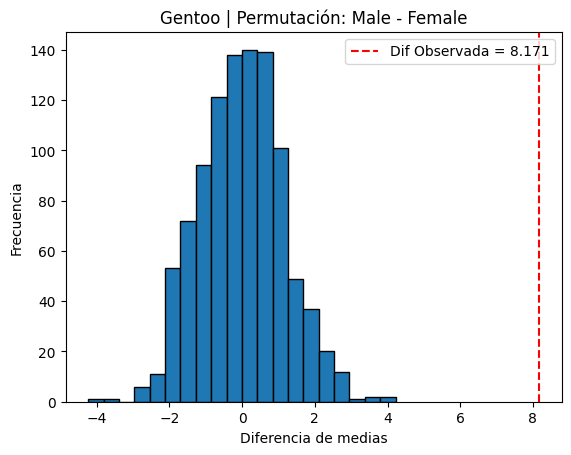

,diff_obs,p_value,n_female,n_male
Adelie,4.293014,0.0,73.0,79.0
Chinstrap,8.176471,0.0,34.0,34.0
Gentoo,8.170607,0.0,58.0,66.0


In [1645]:
species_list = df["species"].dropna().unique()  # lista de especies en el dataset
results = {}

for sp in species_list:
    sub = df[df["species"] == sp]  # datos de una sola especie
    
    counts = sub["sex"].value_counts(dropna=True)  # conteo de machos y hembras
    # Condición: que existan ambos sexos y al menos 5 individuos en cada grupo
    if all(x in counts.index for x in ["Male", "Female"]) and counts.min() >= 5:
        diff_obs, p_val, diffs = permutation_test_diff_means(
            sub, group_col="sex", value_col="flipper_length_mm",
            group_a="Female", group_b="Male", especie=sp,
            n_permutations=1000
        )
        # Guardamos resultados en un diccionario
        results[sp] = {
            "diff_obs": diff_obs,   # diferencia observada
            "p_value": p_val,       # p-valor de la prueba
            "n_female": counts.get("Female", 0),
            "n_male": counts.get("Male", 0)
        }
    else:
        results[sp] = {"note": "Insuficientes datos o falta un sexo"}  # caso especial

# Convertimos los resultados a un DataFrame para verlos más bonito
pd.DataFrame(results).T


Con base en los resultados obtenidos, se observa que en las tres especies (Adelie, Chinstrap y Gentoo) la diferencia observada en la longitud de las aletas entre machos y hembras es positiva y estadísticamente significativa (valores p ≈ 0). Esto significa que la probabilidad de obtener diferencias tan grandes únicamente por azar, al reetiquetar aleatoriamente los sexos en miles de permutaciones, es prácticamente nula. Por esto, se rechaza la hipótesis nula que planteaba que no existe diferencia en la longitud de las aletas entre sexos. Por lo tanto, es posible concluir que la diferencia observada (que en todos los casos indica que los machos tienden a tener aletas más largas que las hembras) no puede atribuirse al azar y refleja un patrón dentro de cada especie de pingüino.